<a href="https://colab.research.google.com/github/ctarrington/try-colab/blob/master/a_b_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from runpy import run_path

import numpy as np
from scipy.stats import beta, norm, rv_histogram

from matplotlib import pyplot as plt
from matplotlib.pyplot import plot, fill_between, vlines, hlines

In [2]:
!rm -rf try-colab
!git clone https://github.com/ctarrington/try-colab.git

rv_utils = run_path("/content/try-colab/myutils/rv_utils.py")
plot_ci = rv_utils.get('plot_ci')
print_ci = rv_utils.get('print_ci')
plot_distributions = rv_utils.get('plot_distributions')

Cloning into 'try-colab'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 155 (delta 75), reused 17 (delta 2), pack-reused 0
Receiving objects: 100% (155/155), 1.15 MiB | 6.57 MiB/s, done.
Resolving deltas: 100% (75/75), done.


## Comparison of two Betas, both with a prior of 30%


In [3]:
(pa, pb) = (3,7)
rv_prior = beta(pa, pb)
rv_a = beta(36+pa, 114+pb)
rv_b = beta(50+pa, 100+pb)

print('a mean', rv_a.mean())
print('b mean', rv_b.mean())


a mean 0.24375
b mean 0.33125


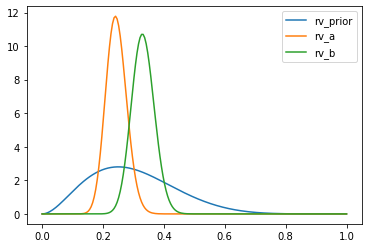

In [4]:
plot_distributions([rv_prior, rv_a, rv_b], ['rv_prior', 'rv_a', 'rv_b'])

## sample from each distribution to get a new distribution of $ \frac {b} {a} $

In [5]:
size = 200_000
b_over_a = [b_sample / a_sample for (b_sample, a_sample) in zip(rv_b.rvs(size), rv_a.rvs(size))]

(array([2.7000e+01, 6.9500e+02, 5.6550e+03, 1.8899e+04, 3.5983e+04,
        4.3594e+04, 3.8252e+04, 2.6678e+04, 1.5549e+04, 7.8250e+03,
        3.9320e+03, 1.6820e+03, 7.2200e+02, 3.1000e+02, 1.1600e+02,
        5.6000e+01, 1.3000e+01, 7.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([0.58309972, 0.71521304, 0.84732636, 0.97943968, 1.111553  ,
        1.24366632, 1.37577964, 1.50789296, 1.64000628, 1.7721196 ,
        1.90423293, 2.03634625, 2.16845957, 2.30057289, 2.43268621,
        2.56479953, 2.69691285, 2.82902617, 2.96113949, 3.09325281,
        3.22536613]),
 <a list of 20 Patch objects>)

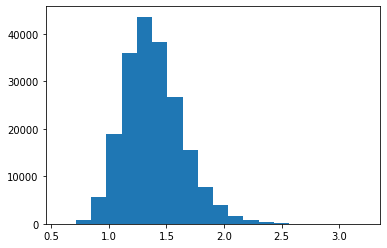

In [6]:
plt.hist(b_over_a, 20)

mean:  1.3858171494817544  median:  1.361025765682176
leftCI 0.025000000000000022 rightCI 0.975
95.0  percent confidence interval 0.9606465213542018  to  1.9540585205124286
Probability  0.9606465213542018  <  b/a  <  1.9540585205124286  =  0.95


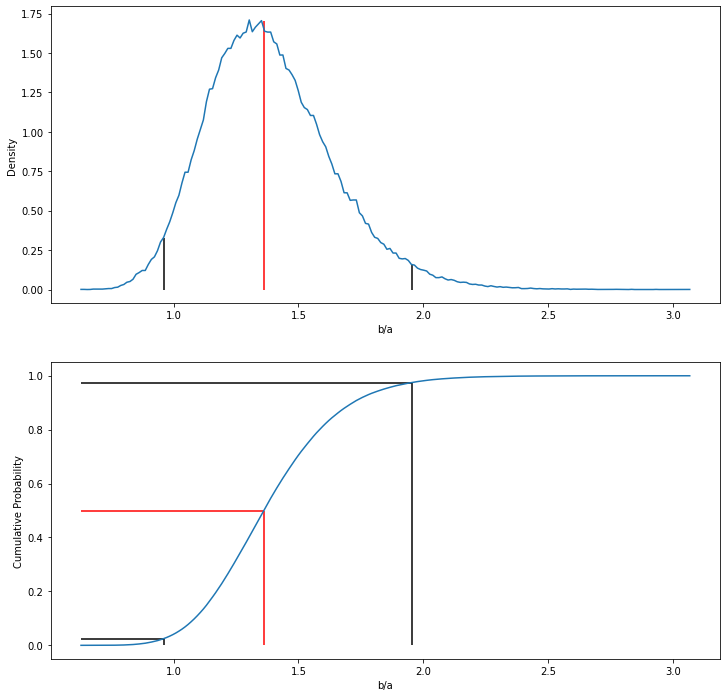

In [7]:
empirical_rv = rv_histogram(np.histogram(b_over_a, bins=200))
plot_ci(empirical_rv, 0.95, 'b/a')

## repeat with a strong prior

95.0  of the distribution is between  0.9229113105881475  and  1.6024429371593298  with a median of  1.2138333313205787


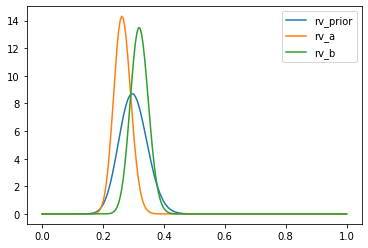

In [8]:
(pa, pb) = (30,70)
rv_prior = beta(pa, pb)
rv_a = beta(36+pa, 114+pb)
rv_b = beta(50+pa, 100+pb)

plot_distributions([rv_prior, rv_a, rv_b], ['rv_prior', 'rv_a', 'rv_b'])

size = 200_000
b_over_a = [b_sample / a_sample for (b_sample, a_sample) in zip(rv_b.rvs(size), rv_a.rvs(size))]
empirical_rv = rv_histogram(np.histogram(b_over_a, bins=200))
print_ci(empirical_rv, 0.95)

## true rates of 0.25 for A and 0.30 for B

## Same strong prior of 0.3, 750 data points gets the 95% CI to start at 1

95.0  of the distribution is between  1.0034536836357246  and  1.3656125477170658  with a median of  1.169950883786093


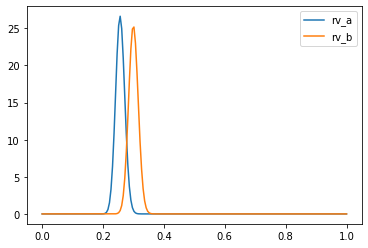

In [9]:
data_size = 750
a_alpha = round(data_size*0.25)
a_beta = data_size - a_alpha
b_alpha = round(data_size*0.3)
b_beta = data_size - b_alpha

p_a_a = 30
p_a_b = 70

p_b_a = 30
p_b_b = 70

rv_a = beta(a_alpha+p_a_a, a_beta+p_a_b)
rv_b = beta(b_alpha+p_b_a, b_beta+p_b_b)
plot_distributions([rv_a, rv_b], ['rv_a', 'rv_b'])

size = 200_000
b_over_a = [b_sample / a_sample for (b_sample, a_sample) in zip(rv_b.rvs(size), rv_a.rvs(size))]
empirical_rv = rv_histogram(np.histogram(b_over_a, bins=200))
print_ci(empirical_rv, 0.95)

## Prior 0.2 for B, 1100 data points required for 95% CI to start above 1 

95.0  of the distribution is between  1.0063430064584513  and  1.309396279361033  with a median of  1.147340492010823


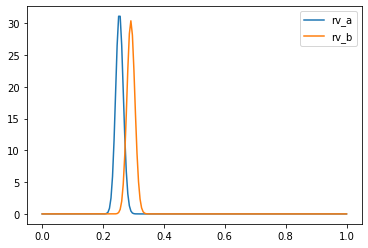

In [10]:
data_size = 1100
a_alpha = round(data_size*0.25)
a_beta = data_size - a_alpha
b_alpha = round(data_size*0.3)
b_beta = data_size - b_alpha

p_a_a = 30
p_a_b = 70

p_b_a = 20
p_b_b = 80

rv_a = beta(a_alpha+p_a_a, a_beta+p_a_b)
rv_b = beta(b_alpha+p_b_a, b_beta+p_b_b)
plot_distributions([rv_a, rv_b], ['rv_a', 'rv_b'])

size = 200_000
b_over_a = [b_sample / a_sample for (b_sample, a_sample) in zip(rv_b.rvs(size), rv_a.rvs(size))]
empirical_rv = rv_histogram(np.histogram(b_over_a, bins=200))
print_ci(empirical_rv, 0.95)